In [1]:
!pip install catboost
!pip install ipywidgets
!pip install shap
!jupyter nbextension enable --py widgetsnbextension

     ---------------------------------------- 73.9/73.9 MB 4.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 435.3/435.3 kB 800.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
from catboost import Pool, CatBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
with open('./dataset/' + 'linebot_train' + '_user_features.pickle', 'rb') as handle:
    X_train = pickle.load(handle)
with open('./dataset/' + 'linebot_test' + '_user_features.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

In [4]:
X_train_features = X_train['cat_train_features']
y_train_scores = X_train['y_train_scores']

print("Train data")
print("User Features shape:", X_train_features.shape)
print("scores shape:", y_train_scores.shape)

Train data
User Features shape: (4280, 140)
scores shape: (4280,)


In [5]:
X_test_features = X_test['cat_test_features']
y_test_scores = X_test['y_test_scores']

print("Test data")
print("User Features shape:", X_test_features.shape)
print("scores shape:", y_test_scores.shape)

Test data
User Features shape: (1070, 140)
scores shape: (1070,)


In [6]:
from catboost import Pool, CatBoostClassifier

In [7]:
X_train_features[:, 15:106] = X_train_features[:, 15:106].astype(str)
X_test_features[:, 15:106] = X_test_features[:, 15:106].astype(str)

In [7]:
feature_importances = [6, 7, 12, 4, 13, 10, 11, 88, 106, 9, 14, 5, 8, 2, 117, 0, 132, 118, 121, 131, 100, 122, 129, 130, 124, 120, 20, 135, 133, 107, 123, 119, 139, 108, 112, 136, 3, 105, 90, 104, 127, 138, 134, 111, 126, 125, 110, 44, 137, 114, 61, 128, 16, 1, 115, 48, 73, 59, 109, 96, 84, 113, 54, 102, 65, 38, 58, 37, 75, 35, 66, 39, 116, 30, 60, 41, 85, 83, 70, 21, 94, 52, 99, 64, 27, 69, 22, 24, 31, 32, 95, 63, 97, 42, 93, 101, 17, 80, 87, 98, 40, 19, 77, 71, 34, 18, 55, 33, 103, 57, 47, 86, 53, 46, 91, 23, 36, 45, 25, 29, 82, 28, 79, 72, 50, 74, 56, 67, 68, 81, 15, 26, 43, 49, 51, 62, 76, 78, 89, 92]

In [8]:
X_train_features = X_train_features[:, feature_importances[:]]
X_test_features = X_test_features[:, feature_importances[:]]

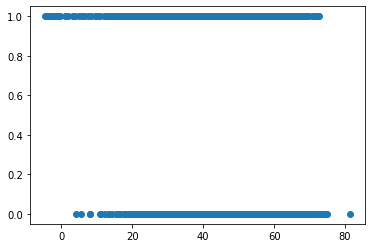

In [8]:
# for i in range(len(X_train_features)):
#     print(X_train_features[i][1], y_train_scores[i])
plt.scatter(X_train_features[:, 1], y_train_scores)

In [9]:
# Time_cat 0
# DBA 1
# In_Outside 2
# Gender 3
# Age
# Education 5
# Occupation 6
# BSRS5
# OpenMindedness_BFI
# Conscientiousness_BFI
# Extraversion_BFI
# Agreeableness_BFI
# NegativeEmotionality_BFI
# NSSNoiseSensitivityScale
# Location 14
# Audio_class_cat_... 15~105
print(X_train_features.shape, X_test_features.shape)
X_train_features[:5]

(4280, 140) (1070, 140)


array([['4', 81.3, '室外', '女性', 23.0, '大學', '學生', 4, 2, 3.5, 2, 3, 2.5,
        2.6, '偏吵雜的工作場所', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', 67.9288210808362, 72.81385013104897,
        76.15121688768451, 82.77402241184832, 85.6451980468612,
        78.48290734391462, 0.0, 0.0, 0.0, 511.0, 999.0,
        50.47718917846747, 56.

In [10]:
features_names = [
'Time_cat', 
'DBA', 
'In_Outside', 
'Gender', 
'Age', 
'Education', 
'Occupation', 
'BSRS5', 
'OpenMindedness_BFI', 
'Conscientiousness_BFI', 
'Extraversion_BFI', 
'Agreeableness_BFI', 
'NegativeEmotionality_BFI', 
'NSSNoiseSensitivityScale', 
'Location', 
'Audio_class_cat_交通噪音', 
'Audio_class_cat_公共汽車', 
'Audio_class_cat_公共空間', 
'Audio_class_cat_剪刀', 
'Audio_class_cat_劈啪作響聲', 
'Audio_class_cat_動物叫聲', 
'Audio_class_cat_卡車', 
'Audio_class_cat_叮噹作響', 
'Audio_class_cat_吹口哨', 
'Audio_class_cat_呼吸聲', 
'Audio_class_cat_咀嚼', 
'Audio_class_cat_咳嗽', 
'Audio_class_cat_哭聲', 
'Audio_class_cat_喇叭聲', 
'Audio_class_cat_喧嘩嘈雜聲', 
'Audio_class_cat_嗡嗡聲', 
'Audio_class_cat_嘎嘎聲', 
'Audio_class_cat_噪音', 
'Audio_class_cat_噴嚏', 
'Audio_class_cat_囓齒動物', 
'Audio_class_cat_垃圾車', 
'Audio_class_cat_城市的或人造的', 
'Audio_class_cat_大房間或大廳', 
'Audio_class_cat_安靜', 
'Audio_class_cat_室內', 
'Audio_class_cat_室外', 
'Audio_class_cat_對話', 
'Audio_class_cat_小房間', 
'Audio_class_cat_尖叫聲', 
'Audio_class_cat_工地噪音', 
'Audio_class_cat_廣播', 
'Audio_class_cat_引擎', 
'Audio_class_cat_心跳聲', 
'Audio_class_cat_戶外', 
'Audio_class_cat_打印機', 
'Audio_class_cat_打嗝', 
'Audio_class_cat_打字聲', 
'Audio_class_cat_拉門聲', 
'Audio_class_cat_掌聲', 
'Audio_class_cat_摩托車', 
'Audio_class_cat_摩擦聲', 
'Audio_class_cat_放屁', 
'Audio_class_cat_敲擊聲', 
'Audio_class_cat_書寫聲', 
'Audio_class_cat_機動車（公路）', 
'Audio_class_cat_機械聲', 
'Audio_class_cat_機械風扇', 
'Audio_class_cat_水上交通工具', 
'Audio_class_cat_沙沙聲', 
'Audio_class_cat_沸騰', 
'Audio_class_cat_流水聲', 
'Audio_class_cat_海浪聲', 
'Audio_class_cat_消防車', 
'Audio_class_cat_滑鼠聲', 
'Audio_class_cat_滴答聲', 
'Audio_class_cat_爆炸聲', 
'Audio_class_cat_球類', 
'Audio_class_cat_環境噪音', 
'Audio_class_cat_白噪聲', 
'Audio_class_cat_直升機', 
'Audio_class_cat_空調', 
'Audio_class_cat_笑聲', 
'Audio_class_cat_箭', 
'Audio_class_cat_粉紅噪音', 
'Audio_class_cat_聲納', 
'Audio_class_cat_腳步聲', 
'Audio_class_cat_自行車', 
'Audio_class_cat_蛙鳴', 
'Audio_class_cat_蟲鳴', 
'Audio_class_cat_說話', 
'Audio_class_cat_警報聲', 
'Audio_class_cat_警笛', 
'Audio_class_cat_跳動聲', 
'Audio_class_cat_車輛', 
'Audio_class_cat_道路噪音', 
'Audio_class_cat_鄉村或自然', 
'Audio_class_cat_鈴聲', 
'Audio_class_cat_鍋碗瓢盆', 
'Audio_class_cat_鐘聲', 
'Audio_class_cat_鐵路交通', 
'Audio_class_cat_鑽頭', 
'Audio_class_cat_雨聲', 
'Audio_class_cat_雷聲', 
'Audio_class_cat_電動工具', 
'Audio_class_cat_電視', 
'Audio_class_cat_音樂', 
'Audio_class_cat_風噪聲（麥克風）', 
'Audio_class_cat_風聲', 
'Audio_class_cat_飛機', 
'Audio_class_cat_馬達聲', 
'Audio_class_cat_鳥類叫聲', 
'Min', 
'LA90', 
'LA50', 
'LA10', 
'Max', 
'Leq', 
'< 45 dBA', 
'45~55dBA', 
'55~65dBA', 
'65~75dBA', 
'> 75dBA', 
'100Hz', 
'125Hz', 
'160Hz', 
'200Hz', 
'250Hz', 
'315Hz', 
'400Hz', 
'500Hz', 
'630Hz', 
'800Hz', 
'1000Hz', 
'1250Hz', 
'1600Hz', 
'2000Hz', 
'2500Hz', 
'3150Hz', 
'4000Hz', 
'5000Hz', 
'6300Hz',
'8000Hz', 
'< 200Hz', 
'200~4000Hz', 
'> 4000Hz' ]
len(features_names)

140

In [11]:
cat_features = []
for idx, value in enumerate(X_train_features[0][:]):
    if isinstance(value, str):
        cat_features.append(idx)
train_dataset = Pool(data=X_train_features[:, :],
                     label=y_train_scores,
                     cat_features=cat_features,
                     feature_names=features_names)

eval_dataset = Pool(data=X_test_features[:, :],
                    label=y_test_scores,
                    cat_features=cat_features,
                    feature_names=features_names)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=4000,
                           learning_rate=0.03,
                           l2_leaf_reg=7,
                           depth=8,
                           use_best_model=True,
                           early_stopping_rounds=300,
                           task_type="GPU",
                           devices='0:1')

# summary = model.select_features(train_dataset,
#                                 eval_set=eval_dataset,
#                                 features_for_select='0-139',
#                                 num_features_to_select=50,
#                                 steps=5,
#                                 train_final_model=True,
#                                 logging_level='Verbose',
#                                 plot=True)
# summary


# Fit model

model.fit(train_dataset, eval_set=eval_dataset, early_stopping_rounds=300, verbose=100, plot=True)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset,
                          prediction_type='RawFormulaVal')


#best params: 'params': {'depth': 10, 'l2_leaf_reg': 7, 'learning_rate': 0.1}
# 'params': {'depth': 8, 'l2_leaf_reg': 7, 'learning_rate': 0.1},
# grid = {'learning_rate': [0.03, 0.1, 0.3],
#         'depth': [8, 10, 12],
#         'l2_leaf_reg': [5, 7, 9]}

# grid_search_result = model.grid_search(grid,
#                                        X=train_dataset,
#                                        verbose=100,
#                                        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6813729	test: 0.6819359	best: 0.6819359 (0)	total: 158ms	remaining: 10m 31s
100:	learn: 0.4371982	test: 0.4671539	best: 0.4671539 (100)	total: 14.2s	remaining: 9m 6s
200:	learn: 0.3918829	test: 0.4438225	best: 0.4438225 (200)	total: 26.1s	remaining: 8m 13s
300:	learn: 0.3612176	test: 0.4369477	best: 0.4367655 (294)	total: 37.6s	remaining: 7m 41s
400:	learn: 0.3394956	test: 0.4326569	best: 0.4326517 (398)	total: 48.8s	remaining: 7m 17s
500:	learn: 0.3198076	test: 0.4294002	best: 0.4293163 (495)	total: 59.8s	remaining: 6m 57s
600:	learn: 0.3041234	test: 0.4273682	best: 0.4273545 (599)	total: 1m 10s	remaining: 6m 39s
700:	learn: 0.2913499	test: 0.4264328	best: 0.4264328 (700)	total: 1m 21s	remaining: 6m 22s
800:	learn: 0.2791009	test: 0.4263706	best: 0.4260274 (786)	total: 1m 32s	remaining: 6m 9s
900:	learn: 0.2652002	test: 0.4260885	best: 0.4257986 (812)	total: 1m 43s	remaining: 5m 57s
1000:	learn: 0.2559584	test: 0.4264148	best: 0.4257986 (812)	total: 1m 54s	remaining: 5m 43

In [12]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_dataset)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_features[0, :9])

<class 'numpy.ndarray'>
[1.49115651e+00 3.81164475e-01 2.34592566e+00 7.09476767e-01
 5.05401986e+00 2.15786355e+00 7.89537940e+00 7.04276436e+00
 2.20098952e+00 2.79343548e+00 3.66912539e+00 4.16647772e+00
 5.64376578e+00 4.13651888e+00 2.70085684e+00 0.00000000e+00
 6.95406307e-01 5.59141792e-03 1.88738261e-03 2.33755610e-03
 1.08453320e+00 3.44096894e-02 9.63926132e-03 2.08510396e-03
 5.71368222e-02 2.39285699e-03 0.00000000e+00 1.81120253e-02
 7.96672815e-04 9.58903895e-04 9.19925307e-02 2.45303461e-02
 7.35256940e-03 1.00993581e-03 0.00000000e+00 1.21039567e-01
 4.87393988e-03 1.54450964e-01 2.51190920e-01 5.63269734e-02
 3.05377432e-03 6.89221195e-02 0.00000000e+00 1.45841334e-07
 5.41511975e-01 2.10179736e-03 1.85301670e-03 0.00000000e+00
 2.93800763e-01 0.00000000e+00 0.00000000e+00 6.66390027e-04
 9.78640944e-03 2.21228271e-03 3.22478419e-01 3.43298589e-03
 1.09249852e-04 8.56078411e-04 1.73610411e-01 3.56512304e-01
 6.03356921e-02 5.50877876e-01 3.40576808e-03 2.36108609e-02


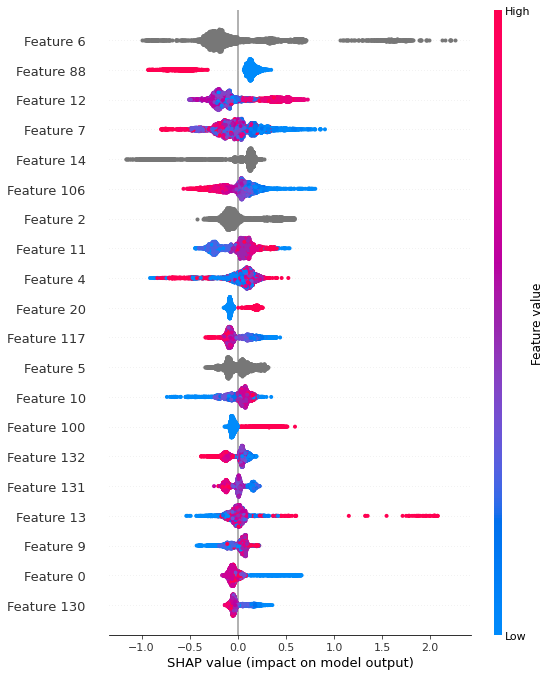

In [13]:
shap_values = model.get_feature_importance(train_dataset, type='ShapValues')
print(type(shap_values))
print(model.feature_importances_)
shap.summary_plot(shap_values[:,:-1], X_train_features[:, :])

In [14]:
user_importances = []
class_importances = []
audio_importances = []
for i, importance in sorted(enumerate(model.feature_importances_), key=(lambda k: k[1]), reverse=True):
    print(features_names[i])
    if i < 15:
        user_importances.append(features_names[i])
    elif i < 106:
        class_importances.append(features_names[i])
    else:
        audio_importances.append(features_names[i])

Occupation
BSRS5
NegativeEmotionality_BFI
Age
Agreeableness_BFI
NSSNoiseSensitivityScale
Audio_class_cat_車輛
Extraversion_BFI
Min
Conscientiousness_BFI
Location
In_Outside
OpenMindedness_BFI
Education
100Hz
3150Hz
Time_cat
Audio_class_cat_音樂
125Hz
2500Hz
2000Hz
250Hz
4000Hz
315Hz
160Hz
Audio_class_cat_動物叫聲
1600Hz
Audio_class_cat_鳥類叫聲
200Hz
LA90
6300Hz
500Hz
Audio_class_cat_鄉村或自然
Audio_class_cat_馬達聲
LA50
< 45 dBA
200~4000Hz
1000Hz
8000Hz
Leq
5000Hz
400Hz
Gender
Audio_class_cat_公共汽車
800Hz
> 4000Hz
630Hz
Audio_class_cat_機械風扇
Audio_class_cat_工地噪音
65~75dBA
Max
55~65dBA
1250Hz
< 200Hz
Audio_class_cat_雨聲
DBA
Audio_class_cat_白噪聲
Audio_class_cat_機動車（公路）
45~55dBA
Audio_class_cat_摩托車
Audio_class_cat_戶外
Audio_class_cat_安靜
Audio_class_cat_風聲
LA10
Audio_class_cat_流水聲
Audio_class_cat_說話
Audio_class_cat_書寫聲
Audio_class_cat_大房間或大廳
Audio_class_cat_海浪聲
Audio_class_cat_垃圾車
> 75dBA
Audio_class_cat_空調
Audio_class_cat_嗡嗡聲
Audio_class_cat_對話
Audio_class_cat_機械聲
Audio_class_cat_呼吸聲
Audio_class_cat_室內
Audio_clas

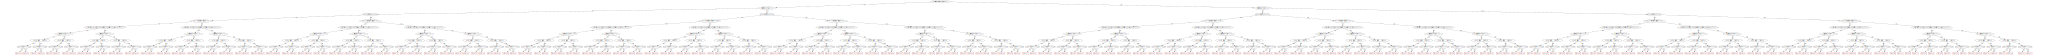

In [15]:
model.plot_tree(
    tree_idx=0,
    pool=train_dataset # "pool" is required parameter for trees with one hot features
)

In [34]:
s = ''
for i, label in enumerate(audio_importances):
    s += (', ' + label[:])
    if i >= 19:
        break
print(s)

, Min, 100Hz, 3150Hz, 125Hz, 250Hz, 2500Hz, 315Hz, 1600Hz, 2000Hz, 500Hz, 200Hz, 6300Hz, 4000Hz, LA90, 400Hz, 160Hz, > 4000Hz, LA50, < 45 dBA, 8000Hz


In [10]:
preds_class

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
preds_proba

array([[0.65061826, 0.34938174],
       [0.10433375, 0.89566625],
       [0.42647838, 0.57352162],
       ...,
       [0.95972733, 0.04027267],
       [0.72525193, 0.27474807],
       [0.64318813, 0.35681187]])

In [12]:
preds_raw

array([-0.62175794,  2.14997292,  0.29623395, ..., -3.17097604,
       -0.97066452, -0.58922858])

In [12]:
from sklearn import metrics

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train_scores,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test_scores,m.predict_proba(test)[:,1]))

In [13]:
auc(model, train_dataset, eval_dataset)

(0.9712075951064377, 0.8903857458780058)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_test_scores, preds_class))
print(f1_score(y_test_scores, preds_class, average="macro"))
print(precision_score(y_test_scores, preds_class, average="macro"))
print(recall_score(y_test_scores, preds_class, average="macro")) 

0.8
0.7999154153734306
0.7999643635753815
0.800426196008174
